In [1]:
import pandas_datareader as web
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
%matplotlib inline

In [2]:
# take a look at AAPL
df = pd.read_csv('../data/AAPL.csv', index_col='Date', parse_dates=True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-13,34.857498,34.705002,34.712502,34.799999,69686800.0,33.052044
2017-03-14,34.912498,34.709999,34.825001,34.747501,61236400.0,33.002182
2017-03-15,35.187500,34.757500,34.852501,35.115002,102767200.0,33.351227
2017-03-16,35.255001,35.064999,35.180000,35.172501,76928000.0,33.405842
2017-03-17,35.250000,34.972500,35.250000,34.997501,175540000.0,33.239635
...,...,...,...,...,...,...
2021-03-05,121.940002,117.570000,120.980003,121.419998,153590400.0,121.419998
2021-03-08,121.000000,116.209999,120.930000,116.360001,153918600.0,116.360001
2021-03-09,122.059998,118.790001,119.029999,121.089996,129159600.0,121.089996


In [3]:
# check for null values
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
def plot_data(df):
    '''
    Plots adjusted closing value over time

    Parameters:
    df (DataFrame): dataframe containing adjusted closing value data

    Returns:
    None
    '''
    df.plot()
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.title('Adj Close vs Date')

Text(0.5, 1.0, 'AAPL')

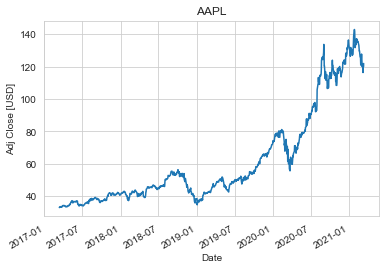

In [5]:
# plot adjusted close
sns.set_style('whitegrid')
df['Adj Close'].plot()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title('AAPL')

In [6]:
future_days = 30  # number of days lookahead for future value
# add target data as 30 day price prediction
df['Future'] = df['Adj Close'].shift(-future_days)

In [7]:
# take a look at the dataframe now
df

,High,Low,Open,Close,Volume,Adj Close,Future
Date,,,,,,,
2017-03-13,34.857498,34.705002,34.712502,34.799999,69686800.0,33.052044,34.317619
2017-03-14,34.912498,34.709999,34.825001,34.747501,61236400.0,33.002182,34.115788
2017-03-15,35.187500,34.757500,34.852501,35.115002,102767200.0,33.351227,34.141903
2017-03-16,35.255001,35.064999,35.180000,35.172501,76928000.0,33.405842,34.108673
2017-03-17,35.250000,34.972500,35.250000,34.997501,175540000.0,33.239635,34.804371
...,...,...,...,...,...,...,...
2021-03-05,121.940002,117.570000,120.980003,121.419998,153590400.0,121.419998,NaN
2021-03-08,121.000000,116.209999,120.930000,116.360001,153918600.0,116.360001,NaN
2021-03-09,122.059998,118.790001,119.029999,121.089996,129159600.0,121.089996,NaN


In [8]:
# define features and labels
X = df[['Adj Close']].iloc[:-future_days]
y = df['Future'].iloc[:-future_days]

In [9]:
# split data into train and test sets
X_train = X.iloc[:-future_days]
y_train = y.iloc[:-future_days]
X_test = X.iloc[-future_days:]
y_test = y.iloc[-future_days:]

## Use decision tree

In [10]:
# train decision tree regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
# make predictions on test dataset
y_pred = dt.predict(X_test)

In [12]:
# store the adjusted close results in a dataframe
results = pd.DataFrame(
    {'Actual': df['Adj Close'].iloc[-future_days:], 'Predicted': y_pred})
results.head()

,Actual,Predicted
Date,,
2021-01-28,136.885452,142.706757
2021-01-29,131.763107,120.711044
2021-02-01,133.939850,120.711044
2021-02-02,134.788589,120.711044
2021-02-03,133.740158,114.600739


In [13]:
# print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 8.757290903727215
Mean Squared Error: 114.54699729070806
Root Mean Squared Error: 10.702663093394468
R2 Score: -1.7740084784301597


Text(0.5, 1.0, 'AAPL')

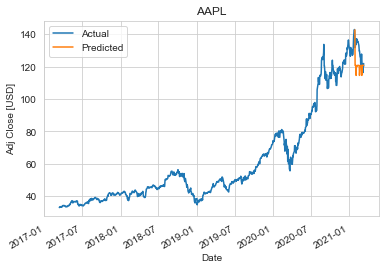

In [14]:
# plot data
df['Adj Close'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title('AAPL')

## Use linear regression

In [15]:
# train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# make predictions on test dataset
y_pred = lr.predict(X_test)

In [17]:
# store the adjusted close results in a dataframe
results = pd.DataFrame(
    {'Actual': df['Adj Close'].iloc[-future_days:], 'Predicted': y_pred})
results.head()

,Actual,Predicted
Date,,
2021-01-28,136.885452,129.602333
2021-01-29,131.763107,136.158147
2021-02-01,133.939850,136.082919
2021-02-02,134.788589,137.039423
2021-02-03,133.740158,134.846994


In [18]:
# print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 12.083826151892454
Mean Squared Error: 234.786807732997
Root Mean Squared Error: 15.322754573933402
R2 Score: -4.685880998014762


Text(0.5, 1.0, 'AAPL')

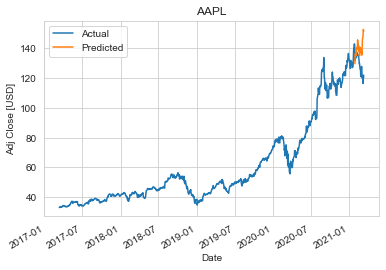

In [20]:
# plot data
df['Adj Close'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title('AAPL')

## Use KNN

In [21]:
# train linear regression model
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
# make predictions on test dataset
y_pred = knr.predict(X_test)

In [23]:
# store the adjusted close results in a dataframe
results = pd.DataFrame(
    {'Actual': df['Adj Close'].iloc[-future_days:], 'Predicted': y_pred})
results.head()

,Actual,Predicted
Date,,
2021-01-28,136.885452,129.448563
2021-01-29,131.763107,115.882608
2021-02-01,133.939850,115.882608
2021-02-02,134.788589,117.004991
2021-02-03,133.740158,116.540491


In [24]:
# print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.117223612467452
Mean Squared Error: 162.0063516939334
Root Mean Squared Error: 12.728171577015035
R2 Score: -2.9233415435409666


Text(0.5, 1.0, 'AAPL')

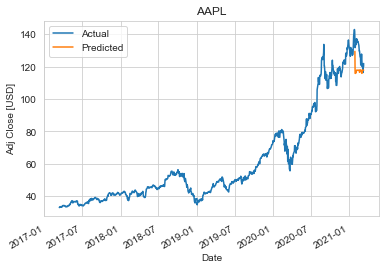

In [25]:
# plot data
df['Adj Close'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title('AAPL')

## Use SVM

In [26]:
# train linear regression model
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [27]:
# make predictions on test dataset
y_pred = svr.predict(X_test)

In [28]:
# store the adjusted close results in a dataframe
results = pd.DataFrame(
    {'Actual': df['Adj Close'].iloc[-future_days:], 'Predicted': y_pred})
results.head()

,Actual,Predicted
Date,,
2021-01-28,136.885452,115.599265
2021-01-29,131.763107,111.533898
2021-02-01,133.939850,111.592687
2021-02-02,134.788589,110.827142
2021-02-03,133.740158,112.521875


In [29]:
# print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 21.118296408743323
Mean Squared Error: 483.3873254022004
Root Mean Squared Error: 21.98607116795087
R2 Score: -10.706291485129631


Text(0.5, 1.0, 'AAPL')

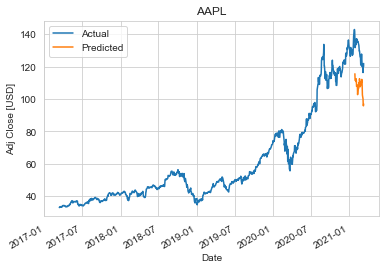

In [30]:
# plot data
df['Adj Close'].plot(label='Actual')
results['Predicted'].plot(label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title('AAPL')